In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [281]:
ff = pd.read_csv("../results/2022_07_flares_vetted.csv")
ff_to_fill = pd.read_csv("../results/2022_07_flares.csv")
ff.shape, ff_to_fill.shape

((9279, 22), (10487, 22))

In [282]:
ids_searched = set(list(ff_to_fill.groupby("ID").indices.keys()))
ids_vetted = set(list(ff.groupby("ID").indices.keys()))
ids_to_add = list(ids_searched-ids_vetted)

In [283]:
ff_to_add = ff_to_fill[ff_to_fill.ID.isin(ids_to_add)]
ff_to_add

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,...,ID,TIC,qcs,mission,tstamp,lc_n,w,mask_pos_outliers_sigma,real,note
9749,384.0,397.0,1699565.0,1699578.0,1274.392011,1274.400866,3.583091,0.119968,0.010962,0.008855,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
9750,1593.0,1597.0,1700774.0,1700778.0,1275.215503,1275.218227,0.611888,0.073710,0.003990,0.002725,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
9751,10965.0,10971.0,1710354.0,1710360.0,1281.740762,1281.744848,1.094538,0.084559,0.006270,0.004087,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
9752,13175.0,13179.0,1712607.0,1712611.0,1283.275353,1283.278077,0.519128,0.064544,0.002727,0.002724,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
9753,20968.0,20973.0,1720457.0,1720462.0,1288.622233,1288.625639,0.666801,0.084410,0.002686,0.003406,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,K2-115,7020254,46,TESS,2022_08_02,4,59.0,2.5,-1.0,NaN
10483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,K2-121,7059054,44,TESS,2022_08_02,1,59.0,2.5,-1.0,NaN
10484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,K2-121,7059054,45,TESS,2022_08_02,2,59.0,2.5,-1.0,NaN
10485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,K2-121,7059054,46,TESS,2022_08_02,3,59.0,2.5,-1.0,NaN


In [284]:
ff_new = ff.append(ff_to_add)
ff_new.iloc[ff.shape[0]-5:ff.shape[0]+5]

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,...,ID,TIC,qcs,mission,tstamp,lc_n,w,mask_pos_outliers_sigma,real,note
9274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-297,48304302,16,Kepler,2022_08_02,3,123.0,2.5,-1.0,NaN
9275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-297,48304302,16,Kepler,2022_08_02,3,123.0,2.5,-1.0,NaN
9276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-297,48304302,15,Kepler,2022_08_02,4,123.0,2.5,-1.0,NaN
9277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-297,48304302,15,Kepler,2022_08_02,4,123.0,2.5,-1.0,NaN
9278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-297,48304302,15,Kepler,2022_08_02,4,123.0,2.5,-1.0,NaN
9749,384.0,397.0,1699565.0,1699578.0,1274.392011,1274.400866,3.583091,0.119968,0.010962,0.008855,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
9750,1593.0,1597.0,1700774.0,1700778.0,1275.215503,1275.218227,0.611888,0.073710,0.003990,0.002725,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
9751,10965.0,10971.0,1710354.0,1710360.0,1281.740762,1281.744848,1.094538,0.084559,0.006270,0.004087,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
9752,13175.0,13179.0,1712607.0,1712611.0,1283.275353,1283.278077,0.519128,0.064544,0.002727,0.002724,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN
9753,20968.0,20973.0,1720457.0,1720462.0,1288.622233,1288.625639,0.666801,0.084410,0.002686,0.003406,...,Kepler-1651,48353358,14,Kepler,2022_08_02,1,125.0,2.5,NaN,NaN


In [285]:
ff_new.shape

(10017, 22)

In [286]:
ff_new.to_csv("../results/2022_07_flares_vetted.csv",index=False)

# Vetting flares

Left to vet: 123
('63001143', 'Kepler-111', 12, 'Kepler', '2022_08_02')
           tstart        tstop          ID       TIC  qcs  real
9633  1141.852353  1141.854396  Kepler-111  63001143   12   NaN


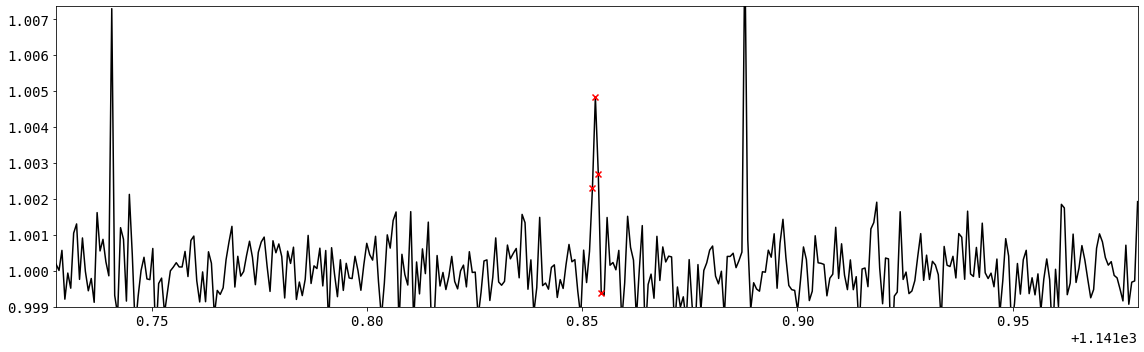

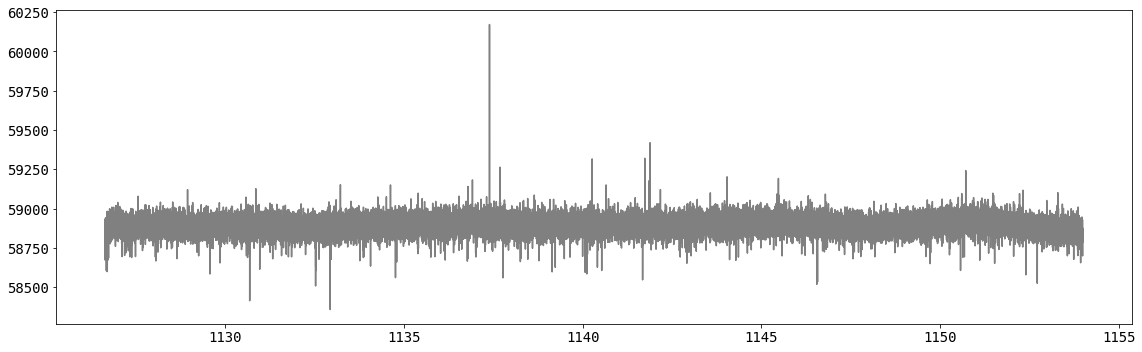

In [403]:
# --------------------------------------
# select flares to vet
f = pd.read_csv("../results/2022_07_flares_vetted.csv")
# ff = ff[(ff.ID == string.split("_")[0]) & (ff.qcs==int(string.split("_")[1]))]
columns = ["TIC","ID","qcs","mission","tstamp"]
name = list(f[f.real.isnull()].groupby(columns).indices)[0]
ff = f[f.real.isnull()].groupby(columns).get_group(name)
TIC, ID, qcs, mission,tstamp = name
shape = f.shape[0]
print(f"Left to vet: {f[f.real.isnull()].shape[0]}")
print(name)
print(ff[['tstart',"tstop","ID","TIC","qcs","real"]])


# ---------------------------------------
# view flares
%matplotlib inline
for j, flare in ff.iloc[:].iterrows():
    ts, tf = flare.tstart, flare.tstop
    t0, t1, i = 1e5, 0., 0
    
    while (ts<t0) | (ts>t1):
        try:
            string = f"{ID}_{qcs:02}_altai_{i}"
            fff = fits.open(f"/media/ekaterina/182C-BC05/lcs_w_phases/{tstamp}_{string}.fits")[1].data
        except FileNotFoundError:
            string = f"{TIC}_{qcs:02}_altai_0"
            fff = fits.open(f"/media/ekaterina/182C-BC05/lcs_w_phases/{tstamp}_{string}.fits")[1].data
        t0,t1 = fff["time"][0],fff["time"][-1]
#         print(t0,ts,t1)
        i+=1
    plt.figure(figsize=(16,5))
    cap=.8
    
#     print(ts,tf)
    _ = fff[np.where((fff['time']>=ts-.1/cap) & (fff['time']<=tf+.1/cap))]
    med = np.median(_['flux'])
    plt.plot(_['time'], _['flux']/med, c="k")
    plt.xlim(_["time"][0],_["time"][-1])
    _ = fff[np.where((fff['time']>=ts-1e-8) & (fff['time']<=tf+1e-8))]
    plt.scatter(_['time'], _['flux']/med, c="r",zorder=10)

    plt.scatter(ts, flare.phase/5 + 1)
    plt.plot(_['time'], _['phase']/5 + 1, c="grey")
    plt.ylim(.999,flare.ampl_rec*1.5 +1)
    
plt.figure(figsize=(16,5))
plt.plot(fff["time"],fff["flux"],c="grey")
# plt.xlim(1590,1595)

In [404]:
f.loc[ff.index,columns+["real"]]

,TIC,ID,qcs,mission,tstamp,real
9633,63001143,Kepler-111,12,Kepler,2022_08_02,NaN


In [405]:
f.loc[ff.index,"real"] = 0

In [406]:
assert f.shape[0] == shape
f.to_csv("../results/2022_07_flares_vetted.csv",index=False)